In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


def train_and_predict(df):
    # encode categorical columns
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = LabelEncoder().fit_transform(df[col].astype(str))

    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)

    return y_train, y_test, model.predict(X_train), model.predict(X_test)


def get_metrics(y_true, y_pred):
    return (
        confusion_matrix(y_true, y_pred),
        precision_score(y_true, y_pred, average="macro"),
        recall_score(y_true, y_pred, average="macro"),
        f1_score(y_true, y_pred, average="macro")
    )



data3 = pd.read_excel("Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")


y_train, y_test, y_train_pred, y_test_pred = train_and_predict(data3)

cm_tr, p_tr, r_tr, f_tr = get_metrics(y_train, y_train_pred)
cm_te, p_te, r_te, f_te = get_metrics(y_test, y_test_pred)

print("Training Confusion Matrix:\n", cm_tr)
print("Precision:", p_tr, "Recall:", r_tr, "F1:", f_tr)

print("\nTest Confusion Matrix:\n", cm_te)
print("Precision:", p_te, "Recall:", r_te, "F1:", f_te)

if f_tr - f_te > 0.1:
    print("\nModel is OVERFITTING")
elif f_tr < 0.6 and f_te < 0.6:
    print("\nModel is UNDERFITTING")
else:
    print("\nModel is REGULAR FIT")

Training Confusion Matrix:
 [[18  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  1  0]
 [ 1  0  1 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 2  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  3]]
Precision: 0.2141025048147855 Recall: 0.09719071532013726 F1: 0.12053507144947503

Test Confusion Matrix:
 [[   0    0    0    0    0    0    0    0    0    0    0    0    1    0
     0    0    1    0    0    0    1   33    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0   10    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    6    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    2    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    1    0    0    0    0    0]
 [   0   

C:\Users\durga\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\durga\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

def price_prediction_metrics(df):
    df = df.copy()

    # convert columns safely to numeric
    for col in ['Price','Open','High','Low']:
        df[col] = df[col].astype(str).str.replace(',', '')
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # convert Volume
    def convert_volume(v):
        v = str(v)
        if 'M' in v:
            return float(v.replace('M','')) * 1_000_000
        elif 'K' in v:
            return float(v.replace('K','')) * 1_000
        else:
            return float(v)

    df['Volume'] = df['Volume'].apply(convert_volume)

    # drop rows with missing values
    df = df.dropna()

    X = df[['Open','High','Low','Volume']]
    y = df['Price']

    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=42)

    model = KNeighborsRegressor(n_neighbors=5)
    model.fit(X_tr, y_tr)

    pred = model.predict(X_te)

    mse = mean_squared_error(y_te, pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_te - pred) / y_te)) * 100
    r2 = r2_score(y_te, pred)

    return mse, rmse, mape, r2


# -------- Main --------
data2 = pd.read_excel("Lab Session Data.xlsx", sheet_name="IRCTC Stock Price")

mse, rmse, mape, r2 = price_prediction_metrics(data2)

print("MSE :", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R2  :", r2)

MSE : 51162.2874
RMSE: 226.19082076865985
MAPE: 10.771392405797345
R2  : 0.14444560517948912


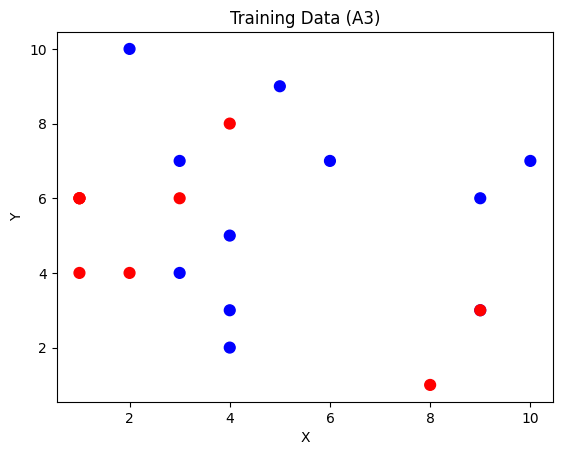

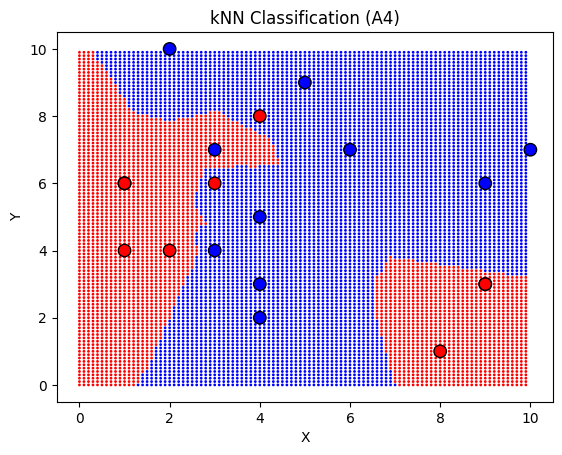

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def generate_training_data():
    # 20 random points between 1 and 10
    X = np.random.randint(1, 11, size=(20, 2))
    
    # Random class labels: 0 (Blue), 1 (Red)
    y = np.random.randint(0, 2, size=20)

    # Plot training data
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", s=60)
    plt.title("Training Data (A3)")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

    return X, y


def classify_and_plot(X, y):
    # Create test grid (0 to 10 step 0.1)
    xx, yy = np.meshgrid(np.arange(0, 10, 0.1),
                         np.arange(0, 10, 0.1))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # kNN with k = 3
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(X, y)

    # Predict class for each grid point
    Z = model.predict(grid)

    # Plot decision space
    plt.scatter(grid[:, 0], grid[:, 1], c=Z, cmap="bwr", s=1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolor="k", s=80)
    plt.title("kNN Classification (A4)")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

X, y = generate_training_data()   # A3
classify_and_plot(X, y)           # A4